# **Visualización y manejo de datos**
Este notebook ha sido creado con la intención de entender el funcionamiento de algunas de las bibliotecas científicas más populares de python, tales como numpy, pandas y matplotlib. Para ello se ha utilizado el dataset [HTRU2](https://archive.ics.uci.edu/ml/machine-learning-databases/00372/HTRU2.zip), que contiene información para la clasificación de candidatos de pulsares.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Para trabajar con los datos que contiene el dataset se ha creado un DataFrame con la información del archivo csv. La lista *headers* contiene los nombres de cada una de las columnas.

In [2]:
# El archivo "HTRU_2.csv" debe encontrarse en el mismo directorio que este notebook. De no ser así, proporcione
# la ubicación del archivo en la variable path.
path = "HTRU/HTRU_2.csv"
headers = ['mean_prof','std_prof','exkurt_prof','skew_prof','mean_curve','std_curve','exkurt_curve','skew_curve','class']
data = pd.read_csv(path, names=headers)

Visualización de las primeras 5 filas del DataFrame.

In [3]:
data.head()

,mean_prof,std_prof,exkurt_prof,skew_prof,mean_curve,std_curve,exkurt_curve,skew_curve,class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


Para analizar cada una de las clases por separado, se han creado 2 nuevos DataFrames a partir *data*. La clase 0 representa a los objetos que no son pulsares, mientras que la clase 1 a los objetos que sí lo son.

In [4]:
no_pulsar = data.loc[data['class'] == 0]
pulsar = data.loc[data['class'] == 1]

El dataset original se compone de 8 características y 1 clase. Para visualizar la distribución de cada característica de acuerdo a su clase, se ha generado su histograma respectivo. Cada figura generada muestra los histogramas normalizados de una característica para cada clase.

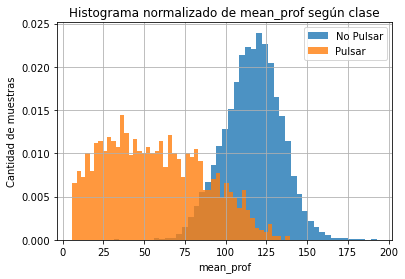

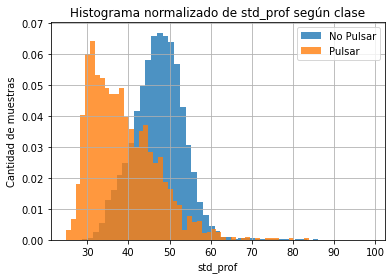

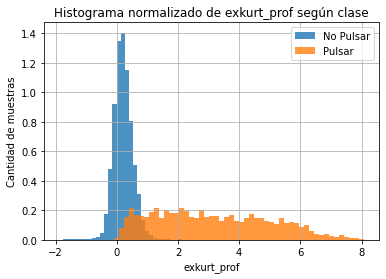

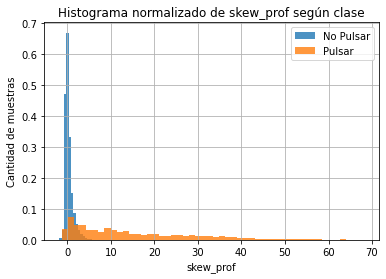

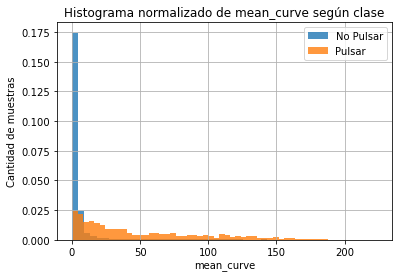

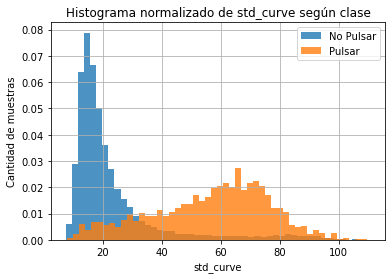

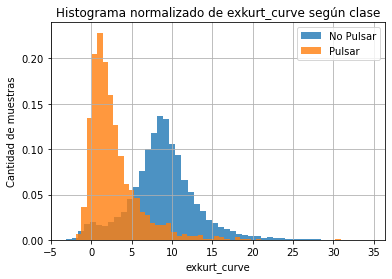

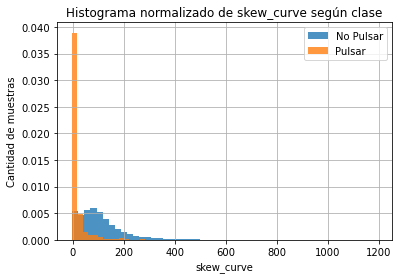

In [5]:
for i in range(len(headers)-1):
    ax = plt.subplot()
    ax.hist(no_pulsar[headers[i]], 50, alpha=0.8, density=True, label='No Pulsar')
    ax.hist(pulsar[headers[i]], 50, alpha=0.8, density=True, label='Pulsar')
    ax.set_xlabel(headers[i])
    ax.set_ylabel('Cantidad de muestras')
    ax.set_title(f'Histograma normalizado de {headers[i]} según clase')
    ax.legend()
    ax.grid(True)
    plt.show()

Además de la media y la varianza, otras medidas que podrían resultar útiles corresponden al skewness y la kurtosis. Para obtener estas medidas basta con utilizar los métodos correspondientes que se encuentran en el módulo pandas.

In [6]:
stats_index = ['no_pulsar_skewness', 'no_pulsar_kurtosis', 'pulsar_skewness', 'pulsar_kurtosis']

stats_data = np.empty((4, 8))
stats_data[0] = no_pulsar.skew().drop('class')
stats_data[1] = no_pulsar.kurtosis().drop('class')
stats_data[2] = pulsar.skew().drop('class')
stats_data[3] = pulsar.kurtosis().drop('class')

stats = pd.DataFrame(stats_data, index=stats_index, columns=headers[0:-1])
stats

,mean_prof,std_prof,exkurt_prof,skew_prof,mean_curve,std_curve,exkurt_curve,skew_curve
no_pulsar_skewness,-0.104386,0.427126,0.971401,4.545891,5.038468,2.581859,0.534252,2.767688
no_pulsar_kurtosis,0.366312,2.353630,11.377569,59.247420,27.204574,6.746908,2.260259,13.630239
pulsar_skewness,0.308597,1.036542,0.306437,0.942712,0.963258,-0.363589,2.271182,8.115754
pulsar_kurtosis,-0.808386,1.661709,-0.880170,0.182500,-0.053478,-0.464914,8.627646,110.558305


Otro tipo de información relevante para la construcción de un modelo corresponde a la correlación entre datos. En este caso, resulta interesante conocer cuál es la correlación entre cada columna del dataset, por lo que se ha implementado una función capaz de entregar esta información.

La intención de esta decisión a pesar de la existencia de un método que ya entrega los datos que se buscan, corresponde a conocer de primera fuente cómo se obtiene este valor.

In [7]:
def correlation_matrix(DataFrame):
  length = len(headers)

  # Vector de medias. Cada elemento es la media de una columna
  u = np.zeros(length)

  # Vector de desviaciones estándar. Cada elemento es la d.e. de una columna
  s = np.zeros(length)

  for i in range(length):
    # Se utiliza el promedio como estimador
    u[i] = np.mean(DataFrame[headers[i]])

    # Se utiliza el estimador sesgado de la desviación estándar
    s[i] = np.sqrt(np.mean((DataFrame[headers[i]] - u[i])**2))

  # Matriz de correlaciones
  corr = np.zeros((length, length))
  for j in range(length):
    # La correlación de una variable consigo misma es 1
    corr[j,j] = 1.0

    for i in range(j+1, length):
      # Estimador para cada elemento de la matriz de correlación
      corr[i,j] = np.mean((DataFrame[headers[i]] - u[i])*(DataFrame[headers[j]] - u[j]))/(s[i]*s[j])
      # La matriz de correlación es simétrica
      corr[j,i] = corr[i,j]
  
  #Se convierte el arreglo de numpy a un DataFrame
  corrDataFrame = pd.DataFrame(data=corr, index=headers, columns=headers)
  return corrDataFrame

La siguiente celda muestra el resultado de la función sobre el set de datos.

In [8]:
MyCorr = correlation_matrix(data)
MyCorr

,mean_prof,std_prof,exkurt_prof,skew_prof,mean_curve,std_curve,exkurt_curve,skew_curve,class
mean_prof,1.000000,0.547137,-0.873898,-0.738775,-0.298841,-0.307016,0.234331,0.144033,-0.673181
std_prof,0.547137,1.000000,-0.521435,-0.539793,0.006869,-0.047632,0.029429,0.027691,-0.363708
exkurt_prof,-0.873898,-0.521435,1.000000,0.945729,0.414368,0.432880,-0.341209,-0.214491,0.791591
skew_prof,-0.738775,-0.539793,0.945729,1.000000,0.412056,0.415140,-0.328843,-0.204782,0.709528
mean_curve,-0.298841,0.006869,0.414368,0.412056,1.000000,0.796555,-0.615971,-0.354269,0.400876
std_curve,-0.307016,-0.047632,0.432880,0.415140,0.796555,1.000000,-0.809786,-0.575800,0.491535
exkurt_curve,0.234331,0.029429,-0.341209,-0.328843,-0.615971,-0.809786,1.000000,0.923743,-0.390816
skew_curve,0.144033,0.027691,-0.214491,-0.204782,-0.354269,-0.575800,0.923743,1.000000,-0.259117
class,-0.673181,-0.363708,0.791591,0.709528,0.400876,0.491535,-0.390816,-0.259117,1.000000


A modo de comparación, se calcula la diferencia entre la matriz obtenida con el método *corr* de la clase DataFrame. Se puede notar que la mayor diferencia es del orden de $10^{-14}$.

In [9]:
pdCorr = data.corr()
MyCorr - pdCorr

,mean_prof,std_prof,exkurt_prof,skew_prof,mean_curve,std_curve,exkurt_curve,skew_curve,class
mean_prof,0.000000e+00,1.110223e-16,2.331468e-15,-6.661338e-16,7.216450e-16,-2.720046e-15,5.551115e-17,-5.273559e-16,1.010303e-14
std_prof,1.110223e-16,0.000000e+00,-2.664535e-15,3.552714e-15,-4.345482e-16,-9.575674e-16,2.428613e-16,3.469447e-16,5.551115e-16
exkurt_prof,2.331468e-15,-2.664535e-15,0.000000e+00,1.332268e-14,1.720846e-15,-1.387779e-15,-2.164935e-15,2.164935e-15,-2.142730e-14
skew_prof,-6.661338e-16,3.552714e-15,1.332268e-14,0.000000e+00,2.220446e-16,6.161738e-15,-3.164136e-15,8.049117e-16,-6.217249e-15
mean_curve,7.216450e-16,-4.345482e-16,1.720846e-15,2.220446e-16,0.000000e+00,4.218847e-15,2.997602e-15,-1.998401e-15,-5.162537e-15
std_curve,-2.720046e-15,-9.575674e-16,-1.387779e-15,6.161738e-15,4.218847e-15,0.000000e+00,1.665335e-15,4.884981e-15,-8.659740e-15
exkurt_curve,5.551115e-17,2.428613e-16,-2.164935e-15,-3.164136e-15,2.997602e-15,1.665335e-15,0.000000e+00,1.554312e-15,4.218847e-15
skew_curve,-5.273559e-16,3.469447e-16,2.164935e-15,8.049117e-16,-1.998401e-15,4.884981e-15,1.554312e-15,0.000000e+00,4.884981e-15
class,1.010303e-14,5.551115e-16,-2.142730e-14,-6.217249e-15,-5.162537e-15,-8.659740e-15,4.218847e-15,4.884981e-15,0.000000e+00


A modo de ejemplo, se pueden ordenar de forma ascendente todas las características de acuerdo a su correlación con la clase de los datos.

In [10]:
class_corr = MyCorr.loc['class']
sorted_class_corr = class_corr.reindex(class_corr.abs().sort_values(ascending=False).index)
sorted_class_corr

class           1.000000
exkurt_prof     0.791591
skew_prof       0.709528
mean_prof      -0.673181
std_curve       0.491535
mean_curve      0.400876
exkurt_curve   -0.390816
std_prof       -0.363708
skew_curve     -0.259117
Name: class, dtype: float64

Por otra parte, también es interesante conocer cuáles son los pares de datos más y menos correlacionados entre sí.

In [11]:
def correlated_pairs(corrMatrix, num_elements, ascending=False):
  length = len(headers)
  # Convierte el DataFrame en Series, donde cada índice es un par (index, column).
  stacked_corr = corrMatrix.stack()

  # Ordena el objeto sorted_corr de forma ascendente si "ascending" es False, y descendente en caso contrario.
  sorted_corr = stacked_corr.reindex(stacked_corr.abs().sort_values(ascending=ascending).index)

  # Se eliminan las correlaciones entre datos consigo mismos.
  if ascending:
    sorted_corr = sorted_corr.drop(sorted_corr.index[-length:])
  else:
    sorted_corr = sorted_corr.drop(sorted_corr.index[0:length])

  # Al ser simétrica la matriz de correlación, los datos fuera de la diagonal están duplicados.
  # Elimina todos los duplicados.
  sorted_corr = sorted_corr.drop(sorted_corr.index[0:length*(length-1):2])
  
  # Selecciona los n primeros elementos.
  n_first = sorted_corr.head(num_elements)
  return n_first

Ahora para conocer los 5 pares de datos más correlacionados sólo se necesita utilizar la función recién definida.

In [12]:
correlated = correlated_pairs(MyCorr, 5)
correlated

exkurt_prof   skew_prof      0.945729
exkurt_curve  skew_curve     0.923743
mean_prof     exkurt_prof   -0.873898
exkurt_curve  std_curve     -0.809786
mean_curve    std_curve      0.796555
dtype: float64

Un scatter plot entre pares de datos permite dilucidar visualmente si existe correlación alguna. Por ejemplo, para el par de datos con la mayor correlación se puede ver que efectivamente existe una correlación, aunque no entrega el valor de la misma.

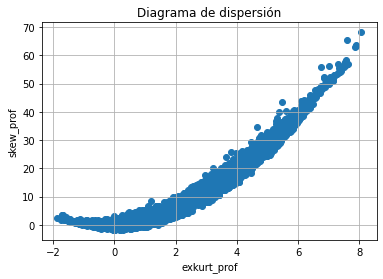

In [13]:
corr_feature1, corr_feature2 = correlated.index[0]

ax = plt.subplot()
ax.scatter(data[corr_feature1], data[corr_feature2])
ax.set_xlabel(corr_feature1)
ax.set_ylabel(corr_feature2)
ax.set_title('Diagrama de dispersión')
ax.grid(True)
plt.show()

Análogamente, para conocer los 5 pares de datos menos correlacionados sólo basta con entregar el parámetro *ascending*.

In [14]:
not_correlated = correlated_pairs(MyCorr, 5, ascending=True)
not_correlated

std_prof      mean_curve    0.006869
              skew_curve    0.027691
exkurt_curve  std_prof      0.029429
std_prof      std_curve    -0.047632
skew_curve    mean_prof     0.144033
dtype: float64

Finalmente, un scatter plot también puede entregar indicios sobre una baja o nula correlación entre datos, tal y como ocurre con el par de datos menos correlacionados del dataset.

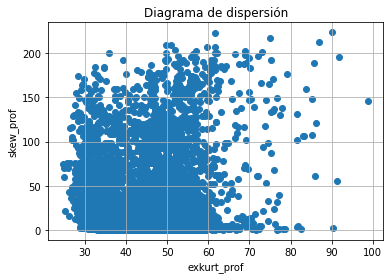

In [15]:
ncorr_feature1, ncorr_feature2 = not_correlated.index[0]

ax = plt.subplot()
ax.scatter(data[ncorr_feature1], data[ncorr_feature2])
ax.set_xlabel(corr_feature1)
ax.set_ylabel(corr_feature2)
ax.set_title('Diagrama de dispersión')
ax.grid(True)
plt.show()